In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True

In [159]:
maxiter = 10000
np.random.seed(0) # fix random seed
w = np.random.uniform(-1,1,maxiter)
z = np.random.uniform(-1,1,maxiter)
wb = np.copy(w)
zb = np.copy(z)
s = 0
for ii in range(maxiter):
    eta = 1.0 / np.power(ii+1, .5) # step size
    
    # incremental averaging
    s = s + eta
    if ii > 0:
        wb[ii] = wb[ii-1] + eta*(w[ii]-wb[ii-1])/s
        zb[ii] = zb[ii-1] + eta*(z[ii]-zb[ii-1])/s
    
    #print(s)
    
    # update
    if ii < maxiter-1:
        w[ii+1] = np.maximum(np.minimum(w[ii] - eta*z[ii], 1),-1)
        z[ii+1] = np.maximum(np.minimum(z[ii] + eta*w[ii], 1),-1)

(<Figure size 432x288 with 1 Axes>,
 Text(0, 0.5, 'zb'),
 Text(0.5, 0, 'iter'),
 Text(0.5, 1.0, 'GDA-z, avg with eta=1/sqrt(t)'))

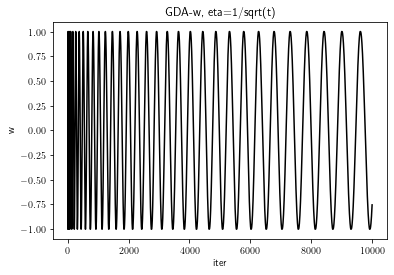

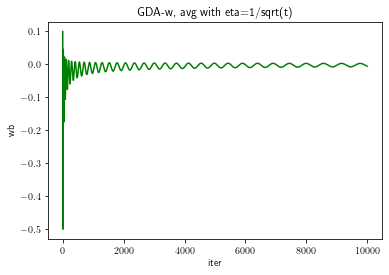

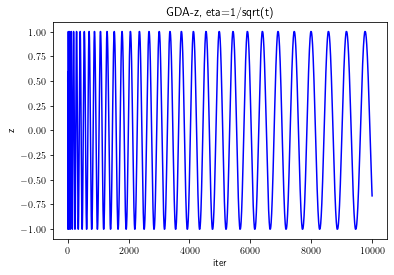

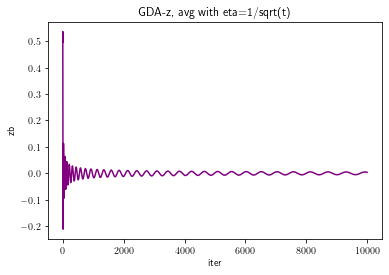

In [160]:
plt.figure(), plt.plot(range(maxiter), w, color='black'), plt.ylabel('w'), plt.xlabel('iter'), plt.title('GDA-w, eta=1/sqrt(t)')
plt.figure(), plt.plot(range(maxiter), wb, color='green'), plt.ylabel('wb'), plt.xlabel('iter'), plt.title('GDA-w, avg with eta=1/sqrt(t)')
plt.figure(), plt.plot(range(maxiter), z, color='blue'), plt.ylabel('z'), plt.xlabel('iter'), plt.title('GDA-z, eta=1/sqrt(t)')
plt.figure(), plt.plot(range(maxiter), zb, color='purple'), plt.ylabel('zb'), plt.xlabel('iter'), plt.title('GDA-z, avg with eta=1/sqrt(t)')